In [2]:


#Importation des Modules nécessaires
import pandas as pd
import sqlalchemy
import mysql.connector
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un fichier __init__.py 
#et également l'ajouter au PATH

import sys
sys.path.insert(0, "/home/apprenant/PycharmProjects/american_dream")


#On peut ensuite importer le dossier comme un module

from src.d01_data.load_data import mysql_connect, save_to_mysql
engine = mysql_connect()



Setup Complete


ModuleNotFoundError: No module named 'pymysql'

J'affiche un échantillon de mes données pour analyser la pertinence des différentes colonnes

In [3]:
df = pd.read_sql("DataAnalystV1",con=engine)

NameError: name 'engine' is not defined

J'affiche un échantillon de mes données pour analyser la pertinence des différentes colonnes

In [ ]:
df1 = pd.read_sql("SalarySurveyV1",con=engine)

le salaire moyen, le salaire median, et représentez les dix déciles. Faites l'exercice pour les deux bases et comparez les résultats.

In [4]:
# le salaire moyen
median_salaire_df1 = df1.SalaryUSD.median()
print(median_salaire_df1)


#le salaire moyen
moyenne_salaire_df1 = df1.SalaryUSD.mean()
print(moyenne_salaire_df1)

90000.0
93946.15499200184


In [26]:
df1.SalaryUSD.describe()

count    8.627000e+03
mean     9.394615e+04
std      5.998446e+04
min      0.000000e+00
25%      6.500000e+04
50%      9.000000e+04
75%      1.150000e+05
max      1.850000e+06
Name: SalaryUSD, dtype: float64

In [236]:
df1["JobTitle"] = df1["JobTitle"].apply( lambda x: "Developer" if x.startswith('Developer') else x )
df1["JobTitle"] = df1["JobTitle"].apply( lambda x: "Database Admin" if x.startswith('DBA') else x )


In [36]:
calcul_moyenne_job = df1[["JobTitle", "SalaryUSD"]].groupby('JobTitle').mean()
print(calcul_moyenne_job)

                                      SalaryUSD
JobTitle                                       
Analyst                            74813.185934
Analytics consultant               61000.000000
Architect                         121853.759152
Consultant                        160000.000000
Data Scientist                    110398.290909
Database Admin                     91947.070856
Database Specialist                79750.000000
DevOps, Sr Software Engineer DBA  120000.000000
Developer                          85524.337416
Engineer                          102749.765306
Manager                           118893.132032
Other                              89509.181259
Principal database engineer       175000.000000
Sales                             300000.000000
Sr Consultant                     122000.000000
Systems Administrator              85500.000000
Technician                         24000.000000


In [40]:
df_plot = calcul_moyenne_job.reset_index(level=['JobTitle'])
print(df_plot)

                            JobTitle      SalaryUSD
0                            Analyst   74813.185934
1               Analytics consultant   61000.000000
2                          Architect  121853.759152
3                         Consultant  160000.000000
4                     Data Scientist  110398.290909
5                     Database Admin   91947.070856
6                Database Specialist   79750.000000
7   DevOps, Sr Software Engineer DBA  120000.000000
8                          Developer   85524.337416
9                           Engineer  102749.765306
10                           Manager  118893.132032
11                             Other   89509.181259
12       Principal database engineer  175000.000000
13                             Sales  300000.000000
14                    Sr Consultant   122000.000000
15             Systems Administrator   85500.000000
16                       Technician    24000.000000


In [41]:
print(df_plot.columns)

Index(['JobTitle', 'SalaryUSD'], dtype='object')


In [1]:
my_beautiful_plot = df_plot.groupby("JobTitle").JobTitle.count().sort_values()
my_beautiful_plot.plot.bar(autopct="%.1f%%");

NameError: name 'df_plot' is not defined

In [44]:
print(df.columns)

Index(['index', 'JobTitle', 'Location', 'CompanyName', 'Size', 'Revenue',
       'Sector', 'SalaryEstimate', 'TypeOfOwnership'],
      dtype='object')
Index(['index', 'SalaryUSD', 'Country', 'PostalCode', 'EmploymentStatus',
       'JobTitle', 'ManageStaff', 'YearsWithThisTypeOfJob', 'HowManyCompanies',
       'OtherPeopleOnYourTeam', 'CompanyEmployeesOverall',
       'PopulationOfLargestCityWithin20Miles', 'EmploymentSector',
       'LookingForAnotherJob', 'CareerPlansThisYear', 'Gender',
       'OtherJobDuties'],
      dtype='object')


Est-il préférable de travailler pour une seule ou plusieurs compagnie

In [91]:
d_compagnie = df1[['HowManyCompanies', 'SalaryUSD']].groupby('HowManyCompanies').mean()
print(d_compagnie)

                                                        SalaryUSD
HowManyCompanies                                                 
1 (this is the only company where I've had this...   88498.161820
2 (I worked at another similar position elsewhe...   95336.045286
3                                                   103691.297593
4                                                   103766.934343
5                                                   113451.034783
6 or more                                           124004.395778
Not Asked                                            92402.030167


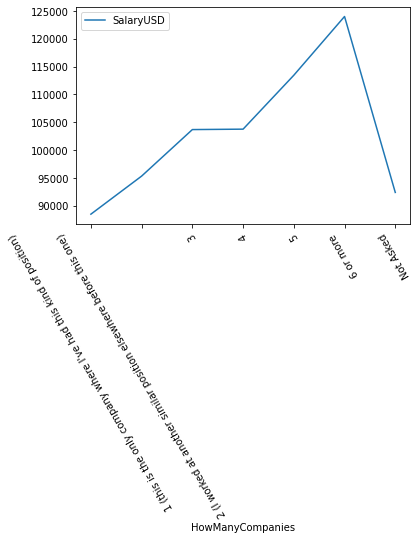

In [170]:

sns.lineplot(data=d_compagnie)
plt.xticks(rotation=120);

In [97]:
#Le nombre de personne dans son équipe a-t-il une influence sur votre salaire?
d_team = df1[['OtherPeopleOnYourTeam', 'SalaryUSD']].groupby('OtherPeopleOnYourTeam')
print(d_team)

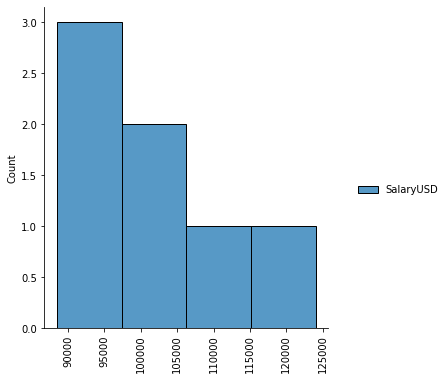

In [136]:
sns.displot(data=d_compagnie)
plt.xticks(rotation=90);

In [115]:
#Il y-a-t-il une inégalité salariale entre les hommes et les femmes dans les emplois liées à la data aux Etats U
d_gender = df1[['Gender', 'SalaryUSD', 'Country']].groupby('Gender').mean()
print(d_gender)

                                                        SalaryUSD
Gender                                                           
Alien                                                54000.000000
Always On Cluster                                    35250.000000
Any human one                                       350000.000000
Apache Helicopter                                   150000.000000
Attack Helicopter                                    81000.000000
Attack Helicopter (M)                                69000.000000
Attack Helicopter. (serious dude, gender questi...  125000.000000
Attack helicopter                                    87500.000000
Attackhelicopter with rabbitears and afro-icela...   50000.000000
Cyborg                                              120000.000000
Dalek                                               110000.000000
Database Administrator                               46659.000000
Dragon                                               65000.000000
Female    

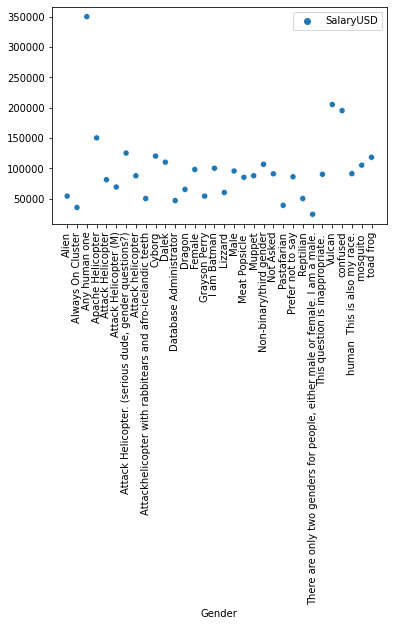

In [118]:
sns.scatterplot(data=d_gender)
plt.xticks(rotation=90);

In [167]:
#Le nombre d'année d'expérience dans ce type d'emploi a t il une influence sur votre salaire?

d_experience = df1[['SalaryUSD']].reindex(df1['YearsWithThisTypeOfJob'])
print(d_experience)

                        SalaryUSD
YearsWithThisTypeOfJob           
5                         79500.0
6                        110000.0
3                         70000.0
3                         70000.0
25                        75000.0
...                           ...
10                        87500.0
2                        100000.0
25                        75000.0
3                         70000.0
5                         79500.0

[8627 rows x 1 columns]


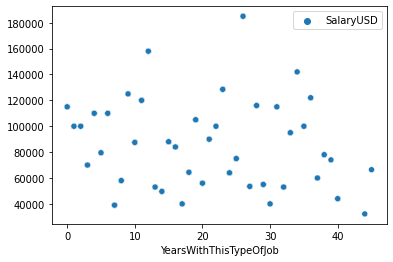

In [172]:
sns.scatterplot(data=d_experience);

In [181]:
#Si cette inégalité salariale existe (suspense), est-elle due au fait que les femmes soient moins bien représentées dans les jobs les mieux payés ou que pour un travail identique elles sont en moyenne moins bien payées?

#je récupère les salaires des hommes
d_salaire_homme_m = df1[df1.Gender=='Male']
print(d_salaire_homme_m)

      index  SalaryUSD        Country PostalCode  \
0         0   115000.0  United States         03   
1         1   100000.0  United States       None   
2         2   100000.0          Spain      28046   
3         3    70000.0  United States      94133   
4         4   110000.0  United States      95354   
...     ...        ...            ...        ...   
5724   5724   156000.0  United States       1463   
5725   5725    49000.0  United States      75904   
5726   5726    60000.0          Spain      28080   
5727   5727    95000.0      Australia       7000   
5728   5728   115000.0  United States      84095   

                                       EmploymentStatus        JobTitle  \
0                                    Full time employee  Database Admin   
1                                    Full time employee       Developer   
2                                    Full time employee           Other   
3                                    Full time employee         Analyst   


NameError: name 'd_salaire_homme' is not defined

In [208]:
#moyenne des salaires des hommes
mean_h= d_salaire_homme_m[['Gender','SalaryUSD']].groupby('Gender').mean()
print(mean_h)

           SalaryUSD
Gender              
Male    95401.441802


In [209]:
#je récupère les salaires des femmes
d_salaire_femme = df1[df1.Gender=='Female']
print(d_salaire_femme)

      index  SalaryUSD         Country PostalCode  \
13       13    53000.0   United States      87544   
38       38    78000.0   United States       None   
46       46    85000.0   United States      98052   
52       52   148000.0   United States      60642   
53       53   148000.0   United States      60642   
...     ...        ...             ...        ...   
5654   5654    48000.0   United States       None   
5669   5669   102960.0   United States         54   
5681   5681   155000.0   United States      80202   
5691   5691    45000.0  United Kingdom  Yorkshire   
5712   5712    50000.0   United States      37027   

                                       EmploymentStatus        JobTitle  \
13                                   Full time employee  Database Admin   
38                                   Full time employee  Database Admin   
46                                   Full time employee       Developer   
52                                   Full time employee  Data S

In [210]:
#moyenne salaire femme
mean_f= d_salaire_femme[['Gender','SalaryUSD']].groupby('Gender').mean()
print(mean_f)

           SalaryUSD
Gender              
Female  97861.037404


In [211]:
#je crée un dataframe de la moyenne des salaire par sexe
moyenne_salaire_sexe = pd.concat([mean_h, mean_f])
print(moyenne_salaire_sexe)

           SalaryUSD
Gender              
Male    95401.441802
Female  97861.037404


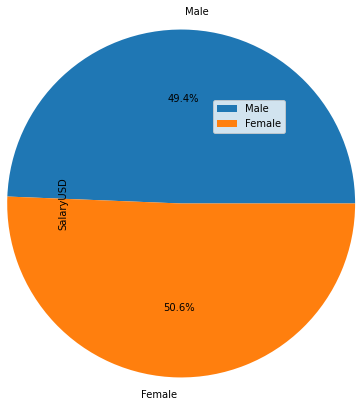

In [212]:
moyenne_salaire_sexe.plot.pie(autopct="%.1f%%", radius=2, subplots=True);

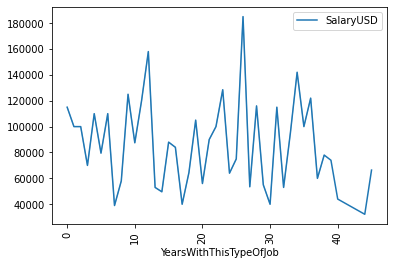

In [214]:
#Y a t il une différence entre l'évolution salariale liées à l'expérience dans un même emploi entre les hommes et les femmes?
sns.lineplot(data=d_experience)
plt.xticks(rotation=90);

In [216]:
#Résumé en quelques lignes votre plan de carrière pour conquérir le rêve américain.
"""
Étant donné que je suis une femme et que la moyenne des salaires des femmes est plus haute que celle des hommes, j'ai plus de chance d'avoir un poste à responsabilité et d'être mieux payée. Le souci c'est que la législation américaine en matière d'emploi n'est pas au top niveau et que niveau santé c'est pas encore ça. Donc personnellement, je resterais en france, histoire de cotiser et de m'assurer une vie décente en cas d'imprévu. 
"""

"\nÉtant donné que je suis une femme et que la moyenne des salaires des femmes est plus haute que celle des hommes, j'ai plus de chance d'avoir un poste à responsabilité et d'être mieux payée. Le souci c'est que la législation américaine en matière d'emploi n'est pas au top niveau et que niveau santé c'est pas encore ça. Donc personnellement, je resterais en france, histoire de cotiser et de m'assurer une vie décente en cas d'imprévu. \n"

In [219]:
#Représentez une "heat-map" des Etats-Unis en fonction du salaire moyen
#Je sélectionne les pays et les salaires dans un dataframe

d_country= df1[['Country','SalaryUSD']].groupby('Country').mean()
print(d_country)

                   SalaryUSD
Country                     
Albania         12000.000000
Anguilla            1.000000
Argentina       23703.846154
Armenia           447.000000
Australia       90588.459548
...                      ...
United States  108578.980329
Uruguay        100777.666667
Vanuatu        103000.000000
Venezuela        5000.000000
Vietnam         36000.000000

[93 rows x 1 columns]


In [227]:
#toutes les lignes liées aux US
d_us_mean=df1[df1.Country=='United States']
print(d_us_mean)


      index  SalaryUSD        Country PostalCode  \
0         0   115000.0  United States         03   
1         1   100000.0  United States       None   
3         3    70000.0  United States      94133   
4         4   110000.0  United States      95354   
5         5    79500.0  United States      78727   
...     ...        ...            ...        ...   
8609   8609    66000.0  United States  Not Asked   
8611   8611    96000.0  United States  Not Asked   
8612   8612    85000.0  United States  Not Asked   
8614   8614   137500.0  United States  Not Asked   
8626   8626   200000.0  United States  Not Asked   

                                       EmploymentStatus        JobTitle  \
0                                    Full time employee  Database Admin   
1                                    Full time employee       Developer   
3                                    Full time employee         Analyst   
4                                    Full time employee  Database Admin   


In [228]:
#moyenne du salaire aux US
mean_us= d_us_mean[['Country','SalaryUSD']].groupby('Country').mean()
print(mean_us)

                   SalaryUSD
Country                     
United States  108578.980329


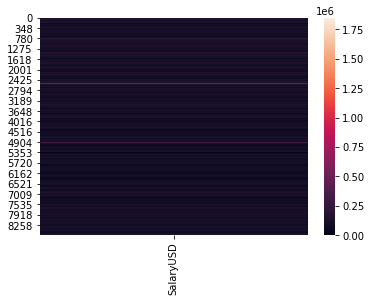

In [235]:
#j'ai tenté le heatmap
mean_us_all= d_us_mean[['SalaryUSD']]

sns.heatmap(data=mean_us_all)
plt.xticks(rotation=90);
